In [9]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, count, isnan, when
spark = SparkSession.builder.appName('Stock Data').getOrCreate()

Loading file in dataframe

In [10]:
dataset = spark.read.csv('./AMZN_data.csv', inferSchema=True, header=True)

In [11]:
dataset.columns

['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

In [12]:
dataset.printSchema()

root
 |-- Date: date (nullable = true)
 |-- Open: double (nullable = true)
 |-- High: double (nullable = true)
 |-- Low: double (nullable = true)
 |-- Close: double (nullable = true)
 |-- Adj Close: double (nullable = true)
 |-- Volume: integer (nullable = true)



In [13]:
dataset.show()

+----------+--------+--------+--------+--------+---------+----------+
|      Date|    Open|    High|     Low|   Close|Adj Close|    Volume|
+----------+--------+--------+--------+--------+---------+----------+
|1997-05-15|0.121875|   0.125|0.096354|0.097917| 0.097917|1443120000|
|1997-05-16|0.098438|0.098958|0.085417|0.086458| 0.086458| 294000000|
|1997-05-19|0.088021|0.088542| 0.08125|0.085417| 0.085417| 122136000|
|1997-05-20|0.086458|  0.0875|0.081771|0.081771| 0.081771| 109344000|
|1997-05-21|0.081771|0.082292| 0.06875|0.071354| 0.071354| 377064000|
|1997-05-22|0.071875|0.072396|0.065625|0.069792| 0.069792| 235536000|
|1997-05-23|0.070313|0.076042|0.066667|   0.075|    0.075| 318744000|
|1997-05-27|0.075521|0.082292|0.072917|0.079167| 0.079167| 173952000|
|1997-05-28| 0.08125|0.081771|0.076563|0.076563| 0.076563|  91488000|
|1997-05-29|0.077083|0.077083|0.073958| 0.07526|  0.07526|  69456000|
|1997-05-30|   0.075|0.075521|0.073958|   0.075|    0.075|  51888000|
|1997-06-02|0.075521

In [14]:
null_checks = [count(when(col(c).isNull(), c)).alias(c) for c in dataset.columns]
dataset.select(null_checks).show()

+----+----+----+---+-----+---------+------+
|Date|Open|High|Low|Close|Adj Close|Volume|
+----+----+----+---+-----+---------+------+
|   0|   0|   0|  0|    0|        0|     0|
+----+----+----+---+-----+---------+------+



In [15]:
from pyspark.ml.linalg import Vector
from pyspark.ml.feature import VectorAssembler

In [16]:
featureassembler=VectorAssembler(inputCols=["Open", "High", "Low"], outputCol='Features')

In [17]:
output=featureassembler.transform(dataset)

In [18]:
output.show()

+----------+--------+--------+--------+--------+---------+----------+--------------------+
|      Date|    Open|    High|     Low|   Close|Adj Close|    Volume|            Features|
+----------+--------+--------+--------+--------+---------+----------+--------------------+
|1997-05-15|0.121875|   0.125|0.096354|0.097917| 0.097917|1443120000|[0.121875,0.125,0...|
|1997-05-16|0.098438|0.098958|0.085417|0.086458| 0.086458| 294000000|[0.098438,0.09895...|
|1997-05-19|0.088021|0.088542| 0.08125|0.085417| 0.085417| 122136000|[0.088021,0.08854...|
|1997-05-20|0.086458|  0.0875|0.081771|0.081771| 0.081771| 109344000|[0.086458,0.0875,...|
|1997-05-21|0.081771|0.082292| 0.06875|0.071354| 0.071354| 377064000|[0.081771,0.08229...|
|1997-05-22|0.071875|0.072396|0.065625|0.069792| 0.069792| 235536000|[0.071875,0.07239...|
|1997-05-23|0.070313|0.076042|0.066667|   0.075|    0.075| 318744000|[0.070313,0.07604...|
|1997-05-27|0.075521|0.082292|0.072917|0.079167| 0.079167| 173952000|[0.075521,0.08229...|

In [19]:
output.select(['Features']).show()

+--------------------+
|            Features|
+--------------------+
|[0.121875,0.125,0...|
|[0.098438,0.09895...|
|[0.088021,0.08854...|
|[0.086458,0.0875,...|
|[0.081771,0.08229...|
|[0.071875,0.07239...|
|[0.070313,0.07604...|
|[0.075521,0.08229...|
|[0.08125,0.081771...|
|[0.077083,0.07708...|
|[0.075,0.075521,0...|
|[0.075521,0.07656...|
|[0.076563,0.07656...|
|[0.073958,0.07447...|
|[0.070833,0.07708...|
|[0.075781,0.08541...|
|[0.082813,0.08541...|
|[0.085417,0.08541...|
|[0.079688,0.08020...|
|[0.079167,0.08229...|
+--------------------+
only showing top 20 rows



In [20]:
output.columns

['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Features']

In [21]:
final_data=output.select("Date", "Features", "Close").sort("Date", ascending=True)

In [22]:
final_data.show()

+----------+--------------------+--------+
|      Date|            Features|   Close|
+----------+--------------------+--------+
|1997-05-15|[0.121875,0.125,0...|0.097917|
|1997-05-16|[0.098438,0.09895...|0.086458|
|1997-05-19|[0.088021,0.08854...|0.085417|
|1997-05-20|[0.086458,0.0875,...|0.081771|
|1997-05-21|[0.081771,0.08229...|0.071354|
|1997-05-22|[0.071875,0.07239...|0.069792|
|1997-05-23|[0.070313,0.07604...|   0.075|
|1997-05-27|[0.075521,0.08229...|0.079167|
|1997-05-28|[0.08125,0.081771...|0.076563|
|1997-05-29|[0.077083,0.07708...| 0.07526|
|1997-05-30|[0.075,0.075521,0...|   0.075|
|1997-06-02|[0.075521,0.07656...|0.075521|
|1997-06-03|[0.076563,0.07656...|0.073958|
|1997-06-04|[0.073958,0.07447...|0.070833|
|1997-06-05|[0.070833,0.07708...|0.077083|
|1997-06-06|[0.075781,0.08541...|0.082813|
|1997-06-09|[0.082813,0.08541...|0.084375|
|1997-06-10|[0.085417,0.08541...|0.079167|
|1997-06-11|[0.079688,0.08020...|0.077083|
|1997-06-12|[0.079167,0.08229...|0.080208|
+----------

In [23]:
train_data, test_data=final_data.randomSplit([0.75,0.25])
print(f"""There are {train_data.count()} rows in the trainning set,
      and {test_data.count()} in the test set""")

There are 5018 rows in the trainning set,
      and 1696 in the test set


Linear Regression model

In [24]:
from pyspark.ml.regression import LinearRegression

In [25]:
regressor=LinearRegression(featuresCol='Features', labelCol='Close')
lr_model=regressor.fit(train_data)

In [26]:
lr_model.coefficients

DenseVector([-0.6612, 0.8361, 0.8252])

In [27]:
lr_model.intercept

0.00953816848002867

In [28]:
pred=lr_model.transform(test_data)
pred.select("Features", "Close", "Prediction").show()

+--------------------+--------+-------------------+
|            Features|   Close|         Prediction|
+--------------------+--------+-------------------+
|[0.081771,0.08229...|0.071354|0.08100411345636589|
|[0.075521,0.07656...|0.075521|0.08550469448019565|
|[0.076563,0.07656...|0.073958|0.08395580883221324|
|[0.075781,0.08541...|0.082813|0.09316515179909393|
|[0.079688,0.08020...|0.077083| 0.0870866168070532|
|[0.079167,0.08229...|0.080208|0.09003251721480399|
|[0.07526,0.076302...|0.075521|0.08459917641341543|
|[0.079948,0.09583...|0.095573|0.10255689771471595|
|[0.091667,0.10104...|     0.1|0.10904840533121196|
|[0.110938,0.1125,...|0.111458|0.12178840379724376|
|[0.11875,0.120573...|0.115625| 0.1268102771066299|
|[0.116667,0.11666...|0.110417|0.11847529774122917|
|[0.108333,0.11510...|0.114583|0.12095942869039668|
|[0.106771,0.10859...|0.105729| 0.1152605388622858|
|[0.105208,0.10625...| 0.10625|0.11519421018329762|
|[0.118229,0.12760...|0.127604|0.13475285532835632|
|[0.126563,0

In [29]:
from pyspark.ml.evaluation import RegressionEvaluator

In [30]:
evaluator = RegressionEvaluator(predictionCol="prediction", labelCol="Close", metricName="mse")
mse = evaluator.evaluate(pred)
evaluator_r2 = RegressionEvaluator(predictionCol="prediction", labelCol="Close", metricName="r2")
r2 = evaluator_r2.evaluate(pred)
print('MSE: ', mse, '\n' + 'r2: ', r2, '\n')

MSE:  0.21715850794696787 
r2:  0.999918530736354 



Random Forest Regressor model

In [31]:
from pyspark.ml.regression import RandomForestRegressor

In [32]:
rf=RandomForestRegressor(featuresCol='Features', labelCol='Close')
rf_model=rf.fit(train_data)

In [33]:
pred2=rf_model.transform(test_data)
pred2.select("Features", "Close", "Prediction").show()

+--------------------+--------+------------------+
|            Features|   Close|        Prediction|
+--------------------+--------+------------------+
|[0.081771,0.08229...|0.071354|0.6639007299870652|
|[0.075521,0.07656...|0.075521|0.6639007299870652|
|[0.076563,0.07656...|0.073958|0.6639007299870652|
|[0.075781,0.08541...|0.082813|0.6639007299870652|
|[0.079688,0.08020...|0.077083|0.6639007299870652|
|[0.079167,0.08229...|0.080208|0.6639007299870652|
|[0.07526,0.076302...|0.075521|0.6639007299870652|
|[0.079948,0.09583...|0.095573|0.6639007299870652|
|[0.091667,0.10104...|     0.1|0.6639007299870652|
|[0.110938,0.1125,...|0.111458|0.6639007299870652|
|[0.11875,0.120573...|0.115625|0.6639007299870652|
|[0.116667,0.11666...|0.110417|0.6639007299870652|
|[0.108333,0.11510...|0.114583|0.6639007299870652|
|[0.106771,0.10859...|0.105729|0.6639007299870652|
|[0.105208,0.10625...| 0.10625|0.6639007299870652|
|[0.118229,0.12760...|0.127604|0.6639007299870652|
|[0.126563,0.15104...|    0.15|

In [34]:
mse = evaluator.evaluate(pred2)
r2 = evaluator_r2.evaluate(pred2)
print('MSE: ', mse, '\n' + 'r2: ', r2, '\n')

MSE:  7.425998751450898 
r2:  0.9972140596477809 



Gradient-Boosted Tree Regression

In [35]:
from pyspark.ml.regression import GBTRegressor

In [36]:
gbt = GBTRegressor(featuresCol='Features', labelCol='Close', maxIter=10)
gbt_model = gbt.fit(train_data)

In [37]:
pred3=gbt_model.transform(test_data)
pred3.select("Features", "Close", "Prediction").show(truncate=False)

+----------------------------+--------+------------------+
|Features                    |Close   |Prediction        |
+----------------------------+--------+------------------+
|[0.081771,0.082292,0.06875] |0.071354|0.2717314539083288|
|[0.075521,0.076563,0.075]   |0.075521|0.2717314539083288|
|[0.076563,0.076563,0.073958]|0.073958|0.2717314539083288|
|[0.075781,0.085417,0.075521]|0.082813|0.2717314539083288|
|[0.079688,0.080208,0.076563]|0.077083|0.2717314539083288|
|[0.079167,0.082292,0.077604]|0.080208|0.2717314539083288|
|[0.07526,0.076302,0.073958] |0.075521|0.2717314539083288|
|[0.079948,0.095833,0.079688]|0.095573|0.2717314539083288|
|[0.091667,0.101042,0.091667]|0.1     |0.2717314539083288|
|[0.110938,0.1125,0.110938]  |0.111458|0.2717314539083288|
|[0.11875,0.120573,0.115104] |0.115625|0.2717314539083288|
|[0.116667,0.116667,0.107292]|0.110417|0.2717314539083288|
|[0.108333,0.115104,0.105208]|0.114583|0.2717314539083288|
|[0.106771,0.108594,0.103646]|0.105729|0.271731453908328

In [38]:
mse = evaluator.evaluate(pred3)
r2 = evaluator_r2.evaluate(pred3)
print('MSE: ', mse, '\n' + 'r2: ', r2, '\n')

MSE:  7.5663666284977245 
r2:  0.9971613991847363 



Linear Regression model

In [39]:
pandas_df = pred.select("Close", "Prediction").toPandas()

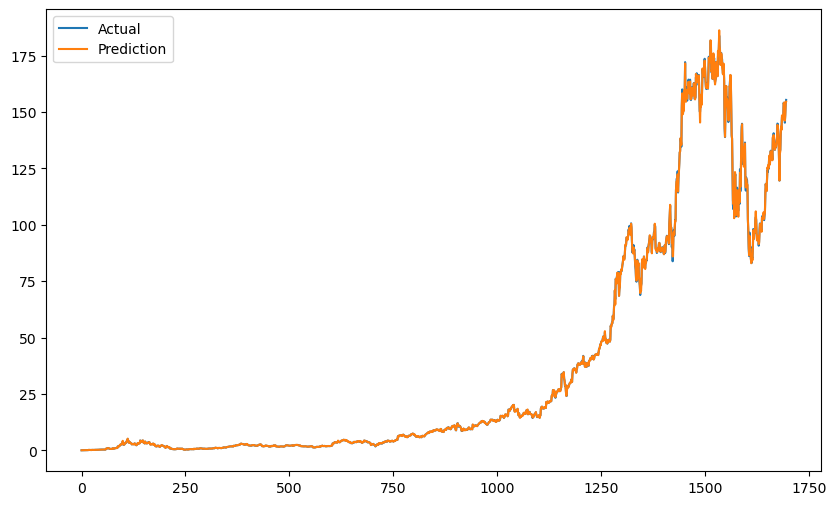

In [40]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(pandas_df['Close'], label='Actual')
plt.plot(pandas_df['Prediction'], label='Prediction')
plt.legend()
plt.show()

In [46]:
lr_model.write().overwrite().save("D:\Year_3\Bigdata\Đồ án\IE212-Stock-price-prediction\Saved model")

In [47]:
from pyspark.ml.regression import LinearRegressionModel
lrModel=LinearRegressionModel.load("D:\Year_3\Bigdata\Đồ án\IE212-Stock-price-prediction\Saved model")
final_output=lrModel.transform(test_data)
final_output.show()

Py4JJavaError: An error occurred while calling o751.load.
: java.lang.UnsatisfiedLinkError: org.apache.hadoop.io.nativeio.NativeIO$POSIX.stat(Ljava/lang/String;)Lorg/apache/hadoop/io/nativeio/NativeIO$POSIX$Stat;
	at org.apache.hadoop.io.nativeio.NativeIO$POSIX.stat(Native Method)
	at org.apache.hadoop.io.nativeio.NativeIO$POSIX.getStat(NativeIO.java:608)
	at org.apache.hadoop.fs.RawLocalFileSystem$DeprecatedRawLocalFileStatus.loadPermissionInfoByNativeIO(RawLocalFileSystem.java:934)
	at org.apache.hadoop.fs.RawLocalFileSystem$DeprecatedRawLocalFileStatus.loadPermissionInfo(RawLocalFileSystem.java:848)
	at org.apache.hadoop.fs.RawLocalFileSystem$DeprecatedRawLocalFileStatus.getPermission(RawLocalFileSystem.java:816)
	at org.apache.hadoop.fs.LocatedFileStatus.<init>(LocatedFileStatus.java:52)
	at org.apache.hadoop.fs.FileSystem$4.next(FileSystem.java:2199)
	at org.apache.hadoop.fs.FileSystem$4.next(FileSystem.java:2179)
	at org.apache.hadoop.mapred.FileInputFormat.singleThreadedListStatus(FileInputFormat.java:287)
	at org.apache.hadoop.mapred.FileInputFormat.listStatus(FileInputFormat.java:244)
	at org.apache.hadoop.mapred.FileInputFormat.getSplits(FileInputFormat.java:332)
	at org.apache.spark.rdd.HadoopRDD.getPartitions(HadoopRDD.scala:208)
	at org.apache.spark.rdd.RDD.$anonfun$partitions$2(RDD.scala:291)
	at scala.Option.getOrElse(Option.scala:189)
	at org.apache.spark.rdd.RDD.partitions(RDD.scala:287)
	at org.apache.spark.rdd.MapPartitionsRDD.getPartitions(MapPartitionsRDD.scala:49)
	at org.apache.spark.rdd.RDD.$anonfun$partitions$2(RDD.scala:291)
	at scala.Option.getOrElse(Option.scala:189)
	at org.apache.spark.rdd.RDD.partitions(RDD.scala:287)
	at org.apache.spark.rdd.RDD.$anonfun$take$1(RDD.scala:1468)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:407)
	at org.apache.spark.rdd.RDD.take(RDD.scala:1462)
	at org.apache.spark.rdd.RDD.$anonfun$first$1(RDD.scala:1503)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:407)
	at org.apache.spark.rdd.RDD.first(RDD.scala:1503)
	at org.apache.spark.ml.util.DefaultParamsReader$.loadMetadata(ReadWrite.scala:587)
	at org.apache.spark.ml.regression.LinearRegressionModel$LinearRegressionModelReader.load(LinearRegression.scala:830)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:374)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.lang.Thread.run(Thread.java:750)
